## Week 2 DataLab 2: Traditional Computer Vision



In today's DataLab session you will explore computer vision methods that does not involve machine learning. You will use an open source computer vision library called OpenCV for today's tasks. At the end of this session, you will be able to detect two overlapping cubes on a white table (Figure 1).

<img src=https://i.imgur.com/LaRFm0k.png width="400">

**Figure 1:** Two overlapping cubes with bounding boxes.

## Learning objectives

1.   Detect edges and contours
2.   Plot image histograms and apply thresholding
3.   Detect objects
4.   Detect overlapping objects

**Important note:** Do not modify/run the task cells showing example outputs. Work on a new cell instead. This way you can compare your outputs to example outputs.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2

In [ ]:
img = cv2.imread('Orig0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

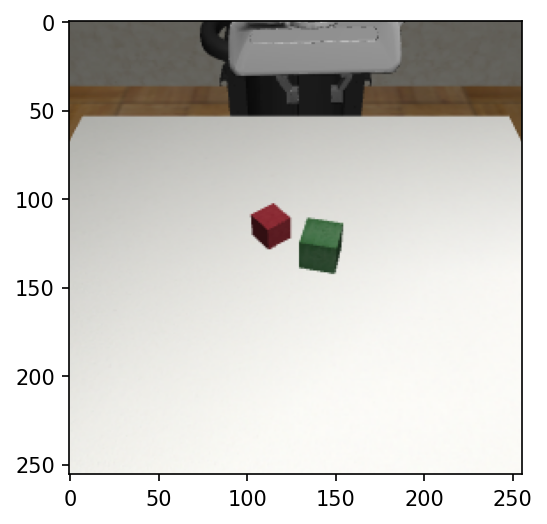

In [ ]:
plt.figure(dpi=150)
plt.imshow(img)

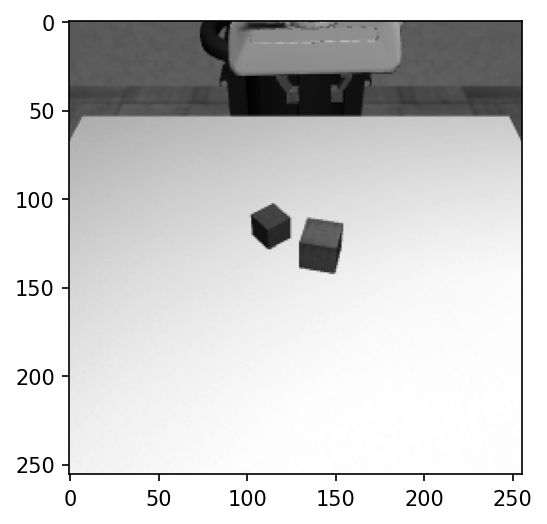

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(dpi=150)
plt.imshow(img_gray, cmap='gray')

# Section 1: Edge and Contour detection

Edge detection is the basic building block of object detection because one can combine edges to obtain the contour of an object. In this section you will detect edges and contours in `img_gray`.


## Task 1.1: Find the edges on img_gray

Pick one edge detection algorithm from the OpenCV library and find the edges on `img_gray`. Edge detectors typically have certain parameters to adjust according to your input image and what you would like to obtain. If applicable, adjust edge detector parameters and observe if there is any change in the detected edges.



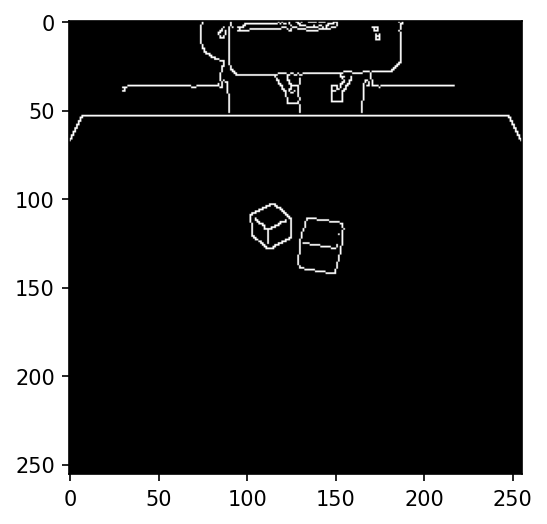

In [ ]:
# TASK CELL 1.1
edges = # YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(edges, cmap='gray')

## Task 1.2: Find the contours on img_gray

Now use the edges you detected on Task 1.1 to find contours using `cv2.findContours(...)`

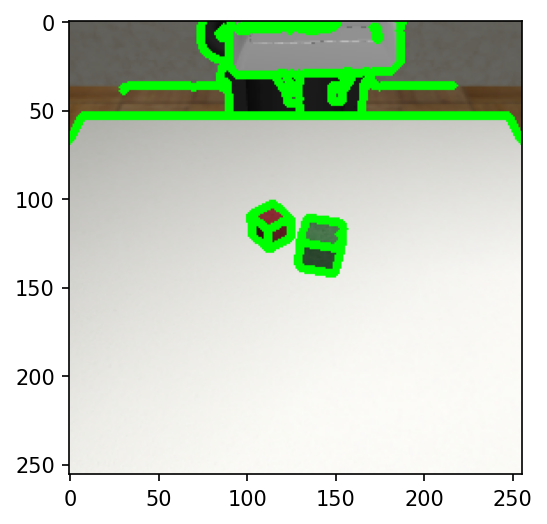

In [ ]:
# TASK CELL 1.2
contours, _ = cv2.findContours(# YOUR CODE HERE #)
plt.figure(dpi=150)
plt.imshow(cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3))

Visualize individual contours and try to find a contours corresponding to boxes. How about the table? Do you think finding the table could be helpful in any way for finding the boxes?

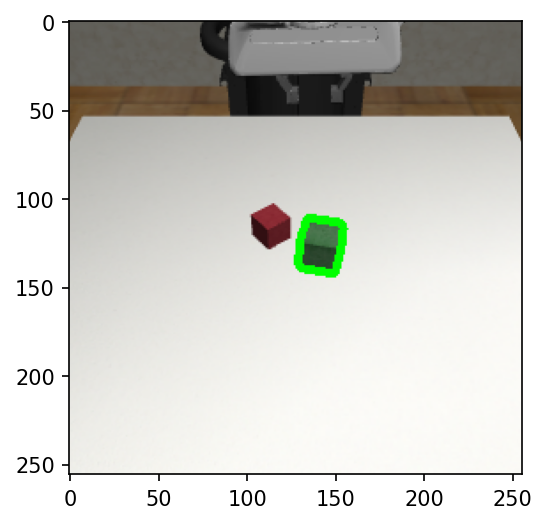

In [ ]:
# TASK CELL 1.2

# YOUR CODE HERE #

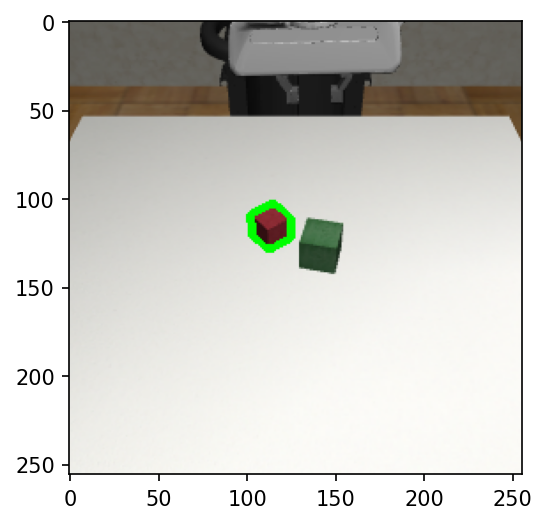

In [ ]:
# TASK CELL 1.2

# YOUR CODE HERE #

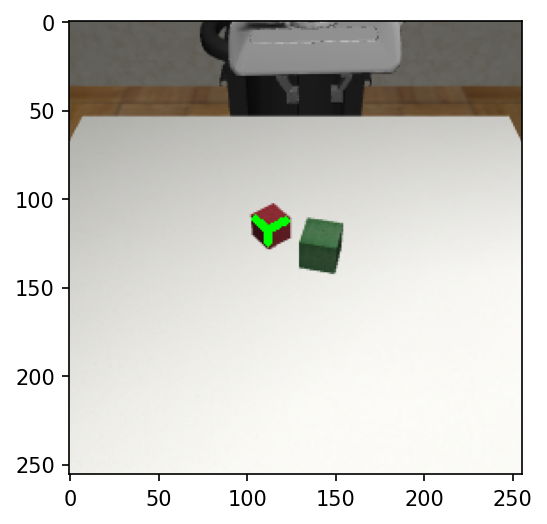

In [ ]:
# TASK CELL 1.2

# YOUR CODE HERE #

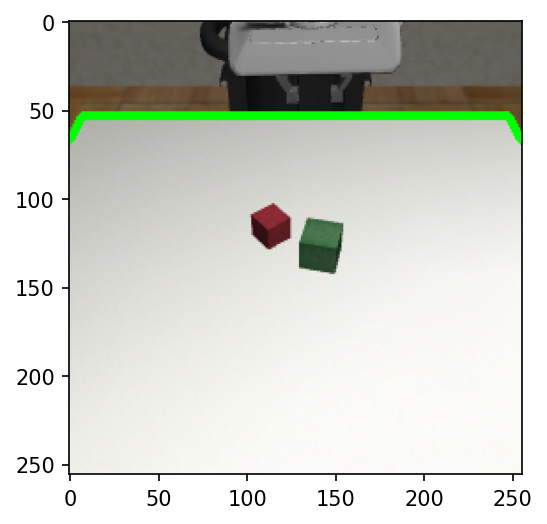

In [ ]:
# TASK CELL 1.2

# YOUR CODE HERE #

# Section 2: Histogram and Thresholding

Understanding image histograms is essential for image processing. Typically, pixels belonging to an object are similar and pixels from different objects are dissimilar in terms of color and intensity. Therefore by ploting histograms we could readily observe peaks corresponding to objects and detect the objects by thresholding. In this section you will apply thresholding in order find the boxes on `img_gray`.

## Task 2.1: Plot the histogram of `img_gray`.

Use numpy or matplotlib or OpenCV to calculate and plot the histogram of `img_gray`. You should see a large peak between 200-255 pixel value range. What object(s) this peak corresponds to?

Text(0, 0.5, 'Count')

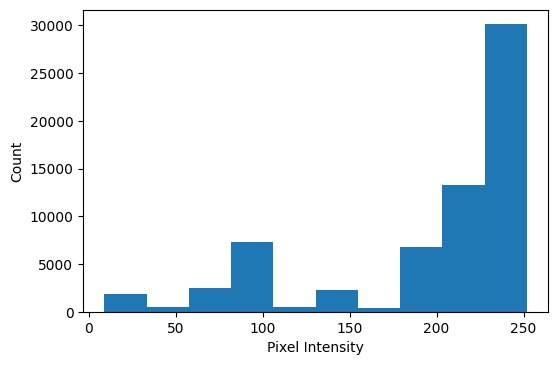

In [ ]:
# TASK CELL 2.1

# YOUR CODE HERE #

## Task 2.2: Apply simple thresholding to `img_gray`.

By looking at the histogram you plotted for Task 2.1 pick a suitable threshold for separating boxes from the background and apply thresholding. Change the threshold value and observe the resulting change in boxes.

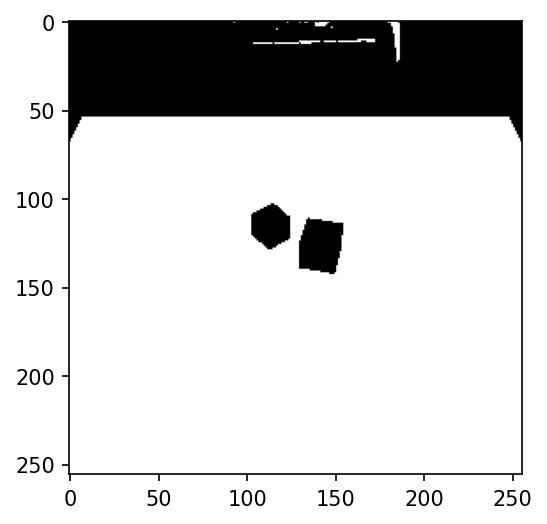

In [ ]:
# TASK CELL 2.2
# YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(th_image, cmap='gray')

What would happen if you plot the histogram of `th_image`? Once you have an answer run the cell below. Does the result look like what you expected?

In [ ]:
plt.figure(dpi=100)
_ = plt.hist(th_image.reshape(-1,))
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')

In object detection, the objects we would like to detect are represented by 1 (or 255) and background by 0. But in the case of `img_gray`, simple thresholding will result in the background (table) with 255 pixel value and boxes with 0 pixel value. Invert the thresholding to achieve an output following the convention.

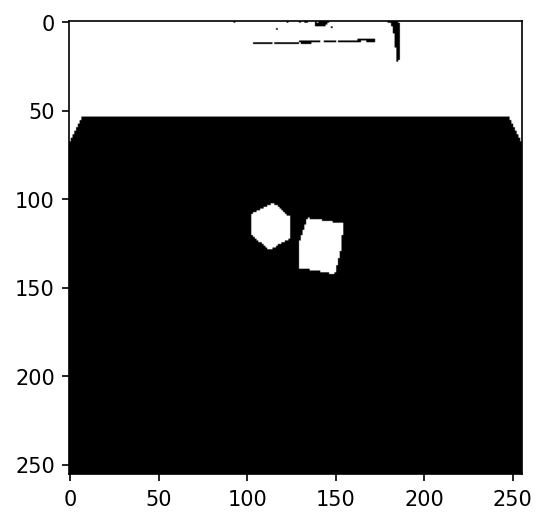

In [ ]:
# TASK CELL 2.2
# YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(th_image, cmap='gray')

# Section 3: Object detection

Thresholding is really helpful for separating foreground pixels from background pixels but how can we move to the next step and detect the objects (i.e. bounding boxes around the objects of interest)?

## Task 3.1: Use connected components to group foreground pixels into individual objects

Thresholding gives us all the foreground pixels but does not tell us which pixel belongs to which objects. For this we can use connect components to group connected pixels into one class. Use `cv2.connectedComponentsWithStats()` and plot individual objects with different colors.

In [ ]:
# TASK CELL 3.1
out = cv2.connectedComponentsWithStats(# YOUR CODE HERE #)
num_labels, labels, stats, centroids = out

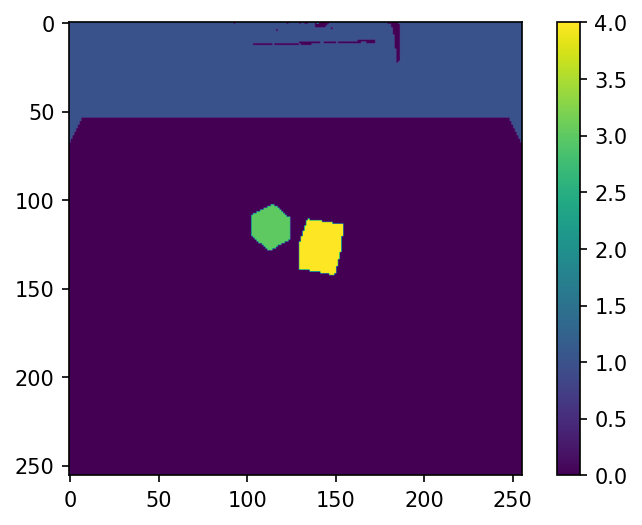

In [ ]:
plt.figure(dpi=150)
plt.imshow(labels)
plt.colorbar()

Print the `stats` variable returned by the `cv2.connectedComponentsWithStats()` method. Make sure you understand what each column corresponds to. This will be crucial for finding/filtering objects in the next steps.

In [ ]:
# print the stats returned by the cv2.connectedComponentsWithStats() method
pd.DataFrame(stats, columns=['leftmost x', 'topmost y', 'w', 'h', 'Area'])

,leftmost x,topmost y,w,h,Area
0,0,0,256,256,50707
1,0,0,256,68,13759
2,140,0,1,1,1
3,103,103,22,26,426
4,130,111,25,32,643


## Task 3.2: Filter the connected components output by area of the objects

Filter the connected components by area column (last column) to find only the boxes.

In [ ]:
# TASK CELL 3.2
area_lower_limit = ...
area_upper_limit = ...
bboxes = stats[# YOUR CODE HERE #]
pd.DataFrame(bboxes, columns=['leftmost x', 'topmost y', 'w', 'h', 'Area'])

,leftmost x,topmost y,w,h,Area
0,103,103,22,26,426
1,130,111,25,32,643


## Task 3.3: Using the filtered results plot bounding boxes around the cubes.

Now everything is ready! Simply use `matplotlib`   to show `img` and `matplotlib.patches` to draw bounding boxes around the cubes.

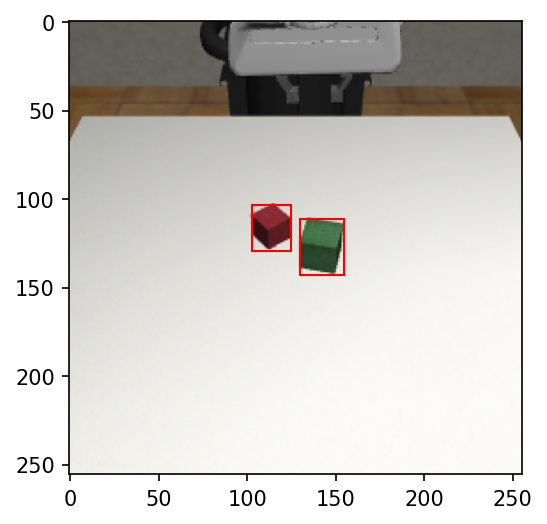

In [ ]:
# TASK CELL 3.3
import matplotlib.patches as patches
# YOUR CODE HERE #

# Section 4: Object detection with overlapping objects

Congrats if you managed to reach this far! Object detection is not easy. But you are no where near done 😊 Now let's make things a little more difficult by working on another image with the name `'Orig5.png'`.

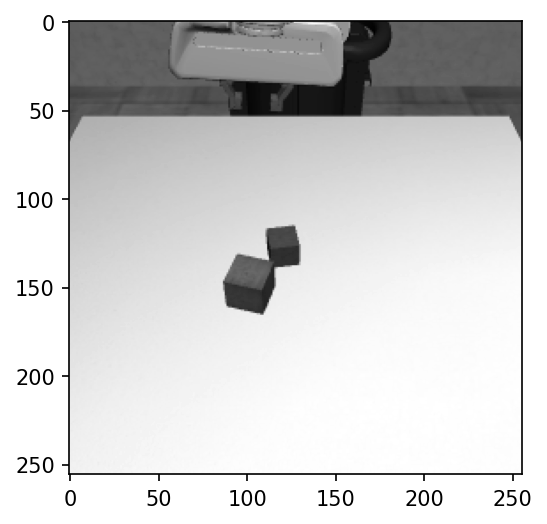

In [ ]:
img = cv2.imread('Orig5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(dpi=150)
plt.imshow(img_gray, cmap='gray')

## Task 4.1: Put together your object detection code from Section 3 and detect objects on the new image.

Repeat what you did in Section 3 and plot bounding boxes on the new `img`

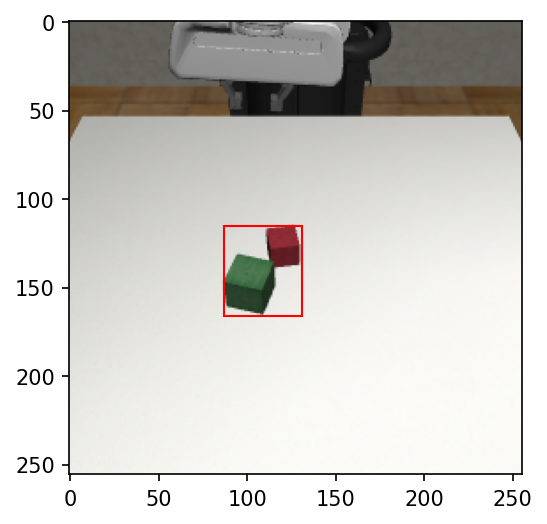

In [ ]:
# TASK CELL 4.1
# YOUR CODE HERE #
# COMBINE YOUR CODE SNIPPETS FROM SECTION 3

You should see two overlapping cubes detected as one object. Why do you think this happened? If you need a hint, plot `th_image`.

In [ ]:
plt.figure(dpi=150)
plt.imshow(th_image, cmap='gray')

In the following tasks, let's look at how to tackle this issue.

## Task 4.2: Apply erosion to `th_image`

What if we delete the boundary pixels of the foreground until overlapping disappears? Do you think this is a reasonable approach? Apply erosion to `th_image` to eliminate overlapping.

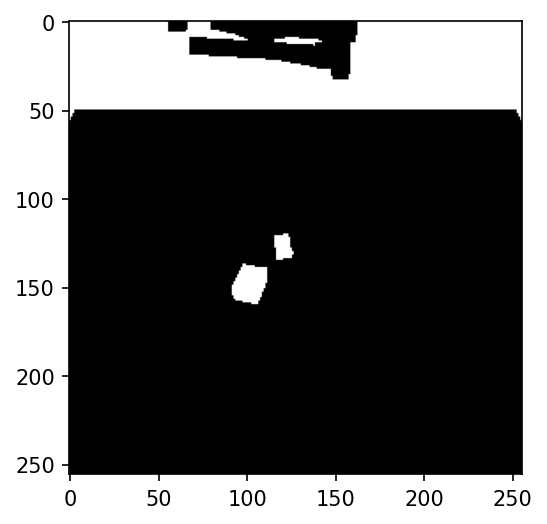

In [ ]:
# TASK CELL 4.2
kernel = # YOUR CODE HERE #
erosion = cv2.erode(# YOUR CODE HERE #)
plt.figure(dpi=150)
plt.imshow(erosion, cmap='gray')

and plot the bounding boxes to see the result.

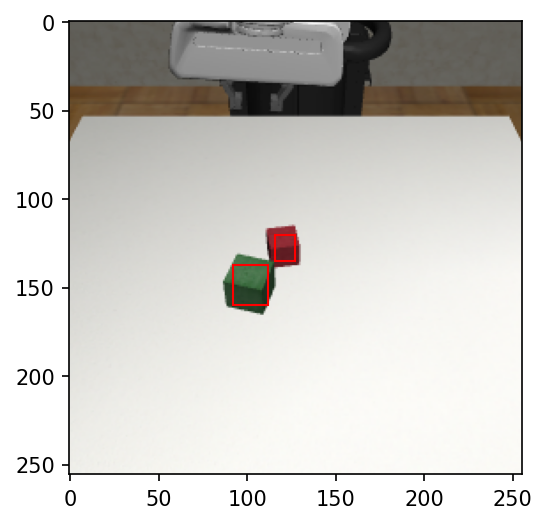

In [ ]:
# TASK CELL 4.2
# YOUR CODE HERE #

Now indeed we have two bounding boxes corresponding to two objects. But the problem is boxes are not really *bounding* due to erosion. Some part of the cubes are outside of the bounding boxes. Let's tackle this in the next task.

## Task 4.3: Find sure background, sure foreground and the unknown region.

Watershed algorithm is widely used to separate overlapping objects. It is used to find a boundary between overlapping objects. The way it works require a sure background (sure_bg), sure foreground (sure_fg) and an unknown region in between the two. So in Task 4.4 you will apply the watershed algorithm. In the current task you will find sure_bg, sure_fg and the unknown region.

**Sure_bg**: If you apply the `dilate` method to the `th_image` you will have a foreground wider than it is supposed to be. This means remaining background is for sure the background.

**Sure_fg**: If you apply the `erode` method to the `th_image` you will have a foreground smaller than it is supposed to be and without overlapping. So you are sure this is the foreground.

**Unknown region**: And finally `sure_bg - sure_fg` will result in the unknown region.

First, filter the `th_image` to get rid of connected components that are not cubes to obtain `th_image_filtered`:

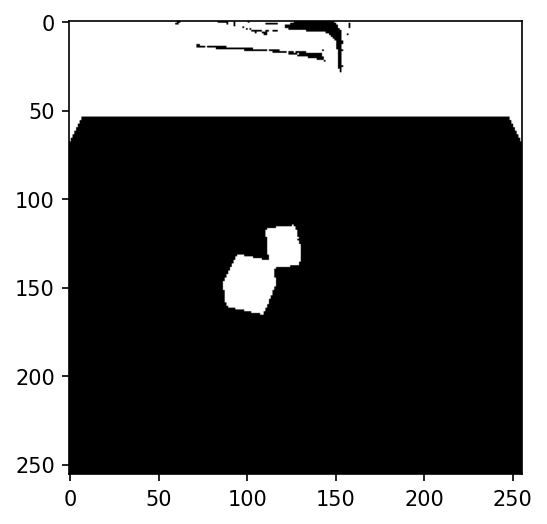

In [ ]:
plt.figure(dpi=150)
plt.imshow(th_image, cmap='gray')

In [ ]:
out = cv2.connectedComponentsWithStats(th_image, connectivity=4)
num_labels, labels, stats, centroids = out

In [ ]:
stats

array([[    0,     0,   256,   256, 50833],
       [    0,     0,   256,    68, 13535],
       [  129,    18,     1,     1,     1],
       [   87,   115,    44,    51,  1167]], dtype=int32)

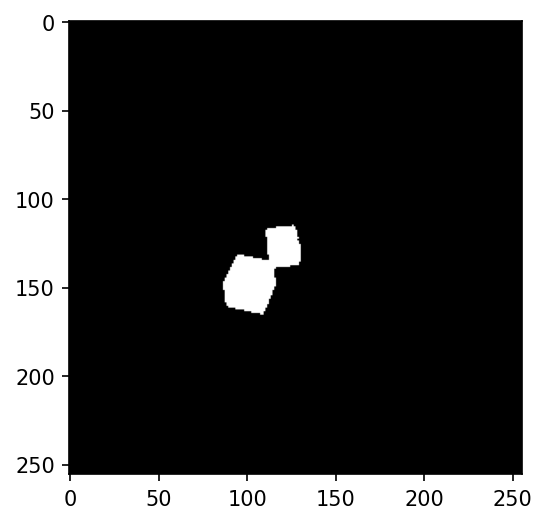

In [ ]:
# TASK CELL 4.3
# YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(th_image_filtered, cmap='gray')

Find the `sure_bg`:

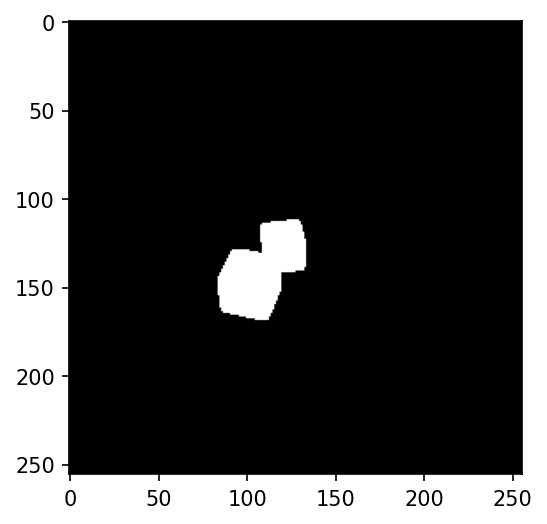

In [ ]:
# TASK CELL 4.3
kernel = # YOUR CODE HERE #
sure_bg = cv2.dilate(# YOUR CODE HERE #)
plt.figure(dpi=150)
plt.imshow(sure_bg, cmap='gray')

Find the `sure_fg`:

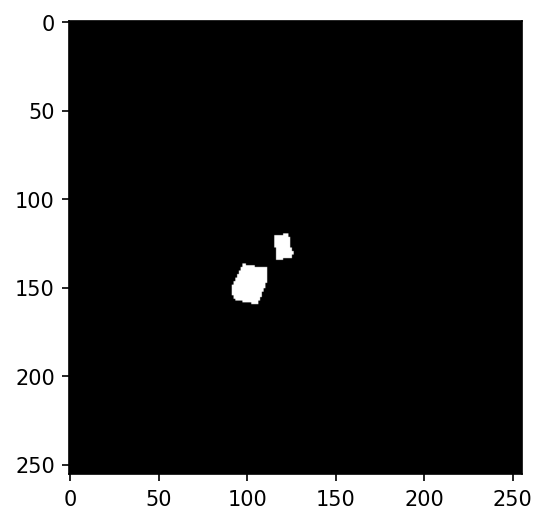

In [ ]:
# TASK CELL 4.3
kernel = # YOUR CODE HERE #
sure_fg = cv2.erode(# YOUR CODE HERE #)
plt.figure(dpi=150)
plt.imshow(sure_fg, cmap='gray')

Find `unknown` which is the difference between `sure_bg` and `sure_fg`:

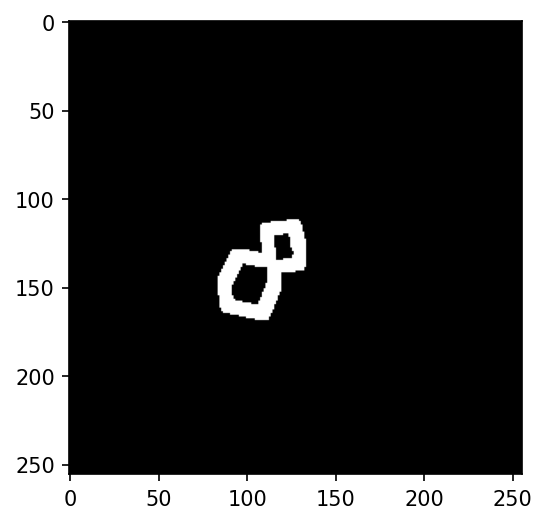

In [ ]:
# TASK CELL 4.3
# YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(unknown, cmap='gray')

## Task 4.4: Watershed



And this is the final task of the day! 
1. Apply connected components to `sure_fg`.
2. Add `1` to all labels in order to set background to `1` (instead of `0`)
3. Set the unknown label as zero
4. Apply cv2.watershed()
5. Draw the bounding boxes

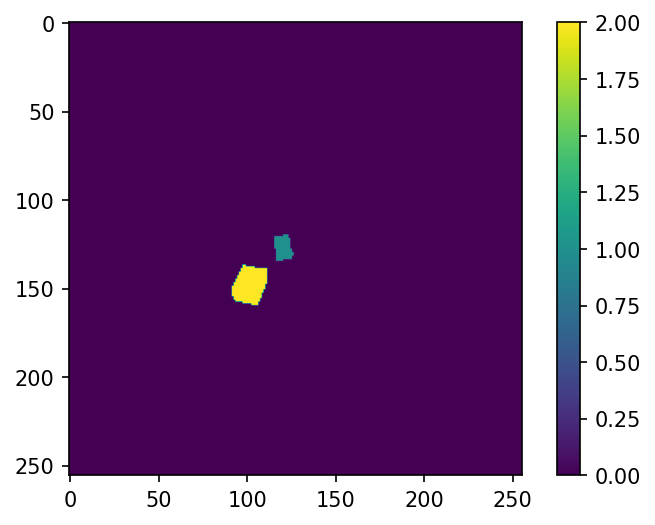

In [ ]:
# TASK CELL 4.4
out = cv2.connectedComponentsWithStats(# YOUR CODE HERE #)
num_labels, labels, stats, centroids = out
plt.figure(dpi=150)
plt.imshow(labels)
plt.colorbar()

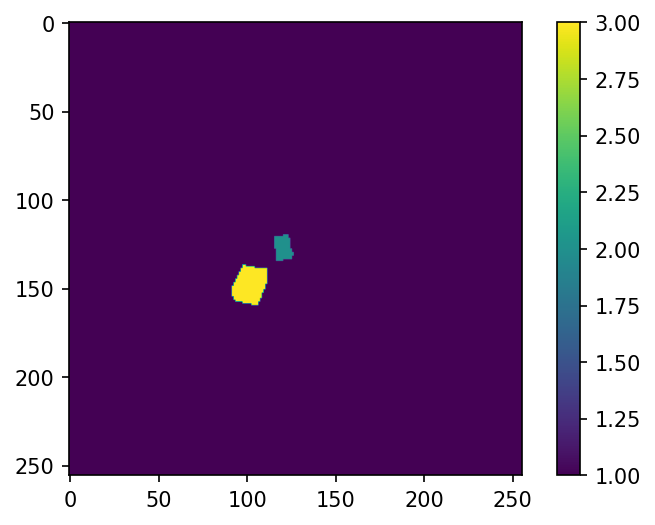

In [ ]:
# TASK CELL 4.4
# Add 1 to all labels in order to set background to 1 (instead of 0)
# YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(labels)
plt.colorbar()

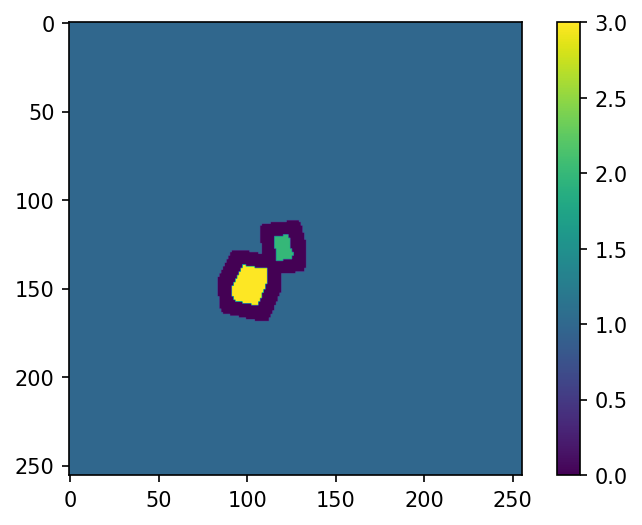

In [ ]:
# TASK CELL 4.4
# Set the unknown label as zero
# YOUR CODE HERE #
plt.figure(dpi=150)
plt.imshow(labels)
plt.colorbar()

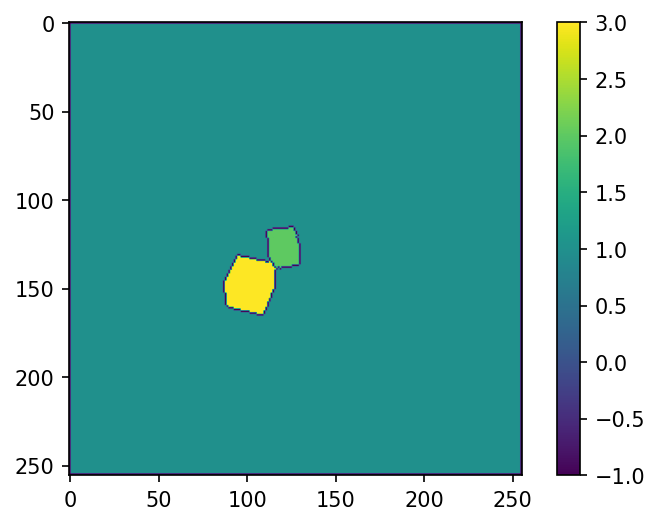

In [ ]:
# TASK CELL 4.4
# This is your final task cell for today :)
# Apply watershed
labels = cv2.watershed(# YOUR CODE HERE #)
plt.figure(dpi=150)
plt.imshow(labels)
plt.colorbar()

In [ ]:
# -1 is border
# 1 is background
# the remaining labels are objects
np.unique(labels)

array([-1,  1,  2,  3], dtype=int32)

In [ ]:
# Get bounding boxes from labels
bboxes = []
for label_val in np.unique(labels):
    if label_val == -1: continue
    if label_val == 1: continue
    y_vals, x_vals = np.where(labels==label_val)
    x = np.min(x_vals)
    w = np.max(x_vals)-x
    y = np.min(y_vals)
    h = np.max(y_vals)-y
    bboxes.append([x, y, w, h])

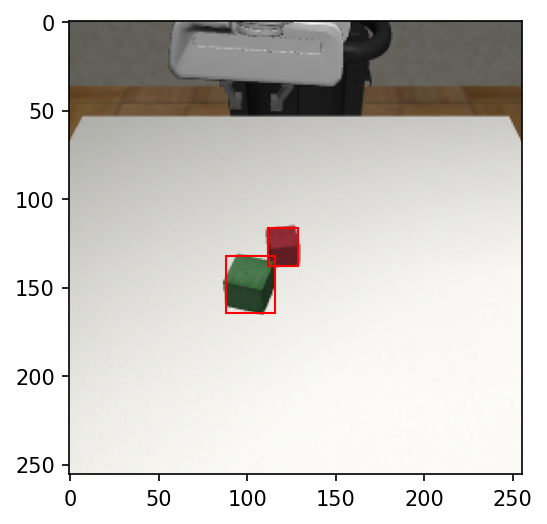

In [ ]:
# Plot the bounding boxes
fig, ax = plt.subplots(dpi=150)
ax.imshow(img)
for bb in bboxes:
    x, y, w, h = bb
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

That's it for today congrats 🎉 If you would like to challenge yourself even further, try the concepts you learned in this datalab to an even harder image shown below:

<img src=https://i.imgur.com/MhVn9FM.png width="200">

**Figure 2:** Detect the 4 objects seen on the table

In [ ]:
#@title Hint

# Suggested OpenCV methods

# cv2.Canny()
# cv2.findContours()
# cv2.drawContours()
# cv2.threshold()
# cv2.connectedComponentsWithStats()
# cv2.erode()
# cv2.dilate()
# cv2.subtract()
# cv2.watershed()





